## Why We Did Not Use DeepFace as the Baseline

At the beginning of our project, we initially planned to use DeepFace as the baseline model for comparison. DeepFace offers a built-in emotion recognition pipeline that outputs confidence scores for several emotions, including anger, on a frame-by-frame basis. Since it was relatively easy to integrate and didn’t require us to train a model, it seemed like a convenient way to benchmark performance.

### Method

To evaluate this method, we processed a subset of labeled videos from our dataset using DeepFace. For each video:

- We sampled frames at regular intervals (roughly every 0.033 seconds).
- Each sampled frame was analyzed using DeepFace's `analyze()` function to extract the anger confidence score.
- We collected the scores across the video and used the **maximum anger score** as the representative value for that clip.
- If the maximum score exceeded a fixed threshold (e.g., 0.6), we labeled the video as “anger”; otherwise, we labeled it “neutral.”
- We compared these predictions to the true labels and calculated evaluation metrics like the confusion matrix and F1 score.

### Limitations

While DeepFace gave us a quick way to extract emotion scores, we ran into a number of limitations:

- Some anger-labeled videos had long stretches of neutral expressions, which pulled down the overall scores and caused false negatives.
- Some neutral videos received high anger scores due to noise — including lighting, motion blur, or facial movements that resembled anger.
- DeepFace treats each frame independently and lacks the ability to model temporal context, which is essential when analyzing videos.
- Since DeepFace was not trained on our specific dataset, the emotion boundaries did not always align with the kind of anger we were trying to detect (e.g., frustration during gameplay).

In [6]:
import os
import cv2
from deepface import DeepFace

# Path to the dataset
base_dir = os.path.expanduser("~/Downloads/Final_project/CMPT419_Dataset")

# Batch of videos we picked for the baseline tests on Deepface

selected_videos = [
    "Anger84", "Anger112", "Anger31", "Anger13", "Anger82", "Anger110",
    "Anger102", "Anger1", "Anger18", "Anger103", "Anger78", "Anger20",
    "Anger85", "Anger108", "Anger10", "Anger30", "Anger16", "Anger17",
    "Anger87", "Anger101", "Anger86", "Anger109", "Anger89", "Anger90",
    "Anger47", "Anger45", "Anger104", "Anger60",
    "Neutral67", "Neutral81", "Neutral32", "Neutral70", "Neutral76",
    "Neutral87", "Neutral64", "Neutral65", "Neutral5", "Neutral17",
    "Neutral68", "Neutral51", "Neutral72", "Neutral82", "Neutral86",
    "Neutral84", "Neutral85", "Neutral44"
]

# Analyze frames roughly every 0.033s (~30fps)
frame_interval = 0.033

def analyze_video(video_path, video_name):
    cap = cv2.VideoCapture(video_path)

    fps = cap.get(cv2.CAP_PROP_FPS)
    if fps is None or fps <= 1e-2:
        fps = 30  # fallback if fps isn't readable

    frame_step = max(1, int(fps * frame_interval))
    frame_id = 0
    anger_scores = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if frame_id % frame_step == 0:
            try:
                # Resize to make DeepFace more stable
                resized_frame = cv2.resize(frame, (640, 480))
                analysis = DeepFace.analyze(resized_frame, actions=['emotion'], enforce_detection=False)
                anger_score = analysis[0]['emotion']['angry']
                anger_scores.append(anger_score)
            except Exception:
                # Skip frame if it can't detect a face
                pass

        frame_id += 1

    cap.release()

    # Compute and print max anger for this video
    if anger_scores:
        max_anger = max(anger_scores)
        print(f"{video_name} -> Max Anger Score: {max_anger:.2f}")
    else:
        print(f"{video_name} -> No face detected in any frame.")

# Loop through and process all selected videos
for video_name in selected_videos:
    folder = os.path.join(base_dir, "Anger" if "Anger" in video_name else "Neutral")
    video_path = os.path.join(folder, video_name + ".mp4")
    analyze_video(video_path, video_name)


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 23.25it/s]


Anger84 -> Max Anger Score: 0.56


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 24.38it/s]


Anger112 -> Max Anger Score: 99.30


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.83it/s]


Anger31 -> Max Anger Score: 57.45


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 23.25it/s]


Anger13 -> Max Anger Score: 7.43


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.85it/s]


Anger82 -> Max Anger Score: 97.73


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 23.25it/s]


Anger110 -> Max Anger Score: 99.96


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 24.38it/s]


Anger102 -> Max Anger Score: 29.19


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.27it/s]


Anger1 -> Max Anger Score: 41.07


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 22.22it/s]


Anger18 -> Max Anger Score: 98.83


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 19.61it/s]


Anger103 -> Max Anger Score: 100.00


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 22.72it/s]


Anger78 -> Max Anger Score: 99.99


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 23.80it/s]


Anger20 -> Max Anger Score: 95.54


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.27it/s]


Anger85 -> Max Anger Score: 99.74


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.83it/s]


Anger108 -> Max Anger Score: 64.00


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 23.25it/s]


Anger10 -> Max Anger Score: 99.93


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.83it/s]


Anger30 -> Max Anger Score: 94.12


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.83it/s]


Anger16 -> Max Anger Score: 75.69


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.40it/s]


Anger17 -> Max Anger Score: 80.77


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.00it/s]


Anger87 -> Max Anger Score: 96.89


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.51it/s]


Anger101 -> Max Anger Score: 100.00


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 13.33it/s]


Anger86 -> Max Anger Score: 63.68


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.51it/s]


Anger109 -> Max Anger Score: 42.93


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.40it/s]


Anger89 -> Max Anger Score: 99.99


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.00it/s]


Anger90 -> Max Anger Score: 7.80


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.18it/s]


Anger47 -> Max Anger Score: 98.78


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 17.71it/s]


Anger45 -> Max Anger Score: 85.98


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.27it/s]


Anger104 -> Max Anger Score: 50.98


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.27it/s]


Anger60 -> Max Anger Score: 100.00


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


Neutral67 -> Max Anger Score: 2.37


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 16.95it/s]


Neutral81 -> Max Anger Score: 33.10


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.73it/s]


Neutral32 -> Max Anger Score: 1.53


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.73it/s]


Neutral70 -> Max Anger Score: 98.82


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.15it/s]


Neutral76 -> Max Anger Score: 36.89


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.27it/s]


Neutral87 -> Max Anger Score: 7.63


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.27it/s]


Neutral64 -> Max Anger Score: 86.95


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.73it/s]


Neutral65 -> Max Anger Score: 78.44


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.27it/s]


Neutral5 -> Max Anger Score: 1.90


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.28it/s]


Neutral17 -> Max Anger Score: 56.82


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.40it/s]


Neutral68 -> Max Anger Score: 19.77


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.83it/s]


Neutral51 -> Max Anger Score: 99.40


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.73it/s]


Neutral72 -> Max Anger Score: 92.86


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.27it/s]


Neutral82 -> Max Anger Score: 17.08


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 15.38it/s]


Neutral86 -> Max Anger Score: 12.25


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 18.18it/s]


Neutral84 -> Max Anger Score: 4.09


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.73it/s]


Neutral85 -> Max Anger Score: 2.03


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.40it/s]

Neutral44 -> Max Anger Score: 0.40



F1 Score: 0.75

Classification Report:
               precision    recall  f1-score   support

     Neutral       0.62      0.72      0.67        18
       Anger       0.80      0.71      0.75        28

    accuracy                           0.72        46
   macro avg       0.71      0.72      0.71        46
weighted avg       0.73      0.72      0.72        46

Confusion Matrix:


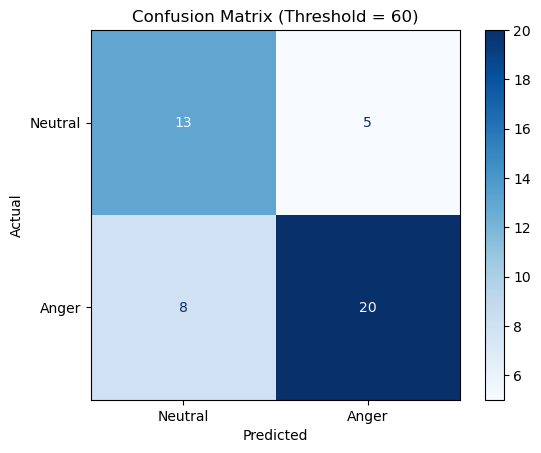

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# DeepFace max anger scores from each video
anger_scores = {
    "Anger84": 0.56, "Anger112": 99.30, "Anger31": 57.45, "Anger13": 7.43, "Anger82": 97.73,
    "Anger110": 99.96, "Anger102": 29.19, "Anger1": 41.07, "Anger18": 98.83, "Anger103": 100.00,
    "Anger78": 99.99, "Anger20": 95.54, "Anger85": 99.74, "Anger108": 64.00, "Anger10": 99.93,
    "Anger30": 94.12, "Anger16": 75.69, "Anger17": 80.77, "Anger87": 96.89, "Anger101": 100.00,
    "Anger86": 63.68, "Anger109": 42.93, "Anger89": 99.99, "Anger90": 7.80, "Anger47": 98.78,
    "Anger45": 85.98, "Anger104": 50.98, "Anger60": 100.00,

    "Neutral67": 2.37, "Neutral81": 33.10, "Neutral32": 1.53, "Neutral70": 98.82, "Neutral76": 36.89,
    "Neutral87": 7.63, "Neutral64": 86.95, "Neutral65": 78.44, "Neutral5": 1.90, "Neutral17": 56.82,
    "Neutral68": 19.77, "Neutral51": 99.40, "Neutral72": 92.86, "Neutral82": 17.08, "Neutral86": 12.25,
    "Neutral84": 4.09, "Neutral85": 2.03, "Neutral44": 0.40
}

# 1 = Anger, 0 = Neutral
y_true = [1 if "Anger" in name else 0 for name in anger_scores]

# Set threshold for classifying as angry
threshold = 60
y_pred = [1 if score > threshold else 0 for score in anger_scores.values()]

# get confusion matrix and F1 score
conf_matrix = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=["Neutral", "Anger"])

# print results
print("\nF1 Score:", round(f1, 2))
print("\nClassification Report:\n", report)

# plot confusion matrix
print("Confusion Matrix:")
labels = ["Neutral", "Anger"]  # confusion matrix labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)

# add labels and title to the plot
plt.title("Confusion Matrix (Threshold = 60)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.grid(False)
plt.show()


## Switching to an Ablation Study with OpenFace Annotations

After testing the DeepFace method, we realized it was not suitable as a reliable baseline for our project. DeepFace was not giving consistent results and lacked the ability to model temporal patterns in the video data, which are important for detecting emotion like anger in gameplay scenarios.

Since we didn’t have a strong baseline model available that was trained on our specific dataset, we decided to approach the problem using an **ablation study**. Our goal was to evaluate how different stages of our emotion detection pipeline affect performance.

We began by using **OpenFace**, a facial behavior analysis toolkit, to generate frame-by-frame annotations of action units (AUs) for each video in our dataset. These AUs describe muscle movements in the face and are commonly used in emotion recognition research.

For our **first model**, we used only the OpenFace AU annotations and trained a simple **LSTM model** on them. This helped us test how well just the temporal dynamics of AUs could predict anger versus neutral states. While this model worked and gave us moderate results, the performance was slightly lower than the next model we tested.

This experiment helped us establish a clear baseline within our own pipeline — a model trained on hand-crafted features (AUs) with temporal modeling. It also set us up for the next step in the ablation study, where we explored a different approach using frame-level visual features from a CNN.

In [7]:
import os
import pandas as pd
import numpy as np

# Base path to OpenFace AU CSVs
base_path = r"C:\Users\henry\Downloads\Final_project\CMPT419_Dataset\openface_output"

# AUs related to anger we want to extract
aus = ['AU04_r', 'AU05_r', 'AU07_r', 'AU10_r', 'AU17_r', 'AU23_r']

# Length of each video sequence (LSTM needs consistent length)
seq_len = 100

X = []
y = []

# Function to load a single video’s AU time series
def load_au_sequence(csv_path):
    df = pd.read_csv(csv_path)

    # Fix: remove spaces from all column names
    df.columns = df.columns.str.strip()

    # Filter only successful face detection frames
    if 'success' in df.columns:
        df = df[df['success'] == 1]

    # Keep only the AU columns we care about (if they exist)
    valid_aus = [col for col in aus if col in df.columns]
    df = df[valid_aus]

    if df.empty or df.shape[1] == 0:
        print(f"❌ No valid AUs in {csv_path} — found columns: {df.columns.tolist()}")
        return None

    # Pad or crop to exactly 100 frames
    if len(df) < seq_len:
        pad = pd.DataFrame(np.zeros((seq_len - len(df), len(valid_aus))), columns=valid_aus)
        df = pd.concat([df, pad], ignore_index=True)
    else:
        df = df.iloc[:seq_len]

    return df.values

# Load anger videos
anger_dir = os.path.join(base_path, "Anger")
for folder in os.listdir(anger_dir):
    csv_file = os.path.join(anger_dir, folder, f"{folder}.csv")
    if os.path.exists(csv_file):
        seq = load_au_sequence(csv_file)
        if seq is not None:
            print(f"✔ Loaded: {csv_file} → shape: {seq.shape}")
            X.append(seq)
            y.append(1)

# Load neutral videos
neutral_dir = os.path.join(base_path, "Neutral")
for folder in os.listdir(neutral_dir):
    csv_file = os.path.join(neutral_dir, folder, f"{folder}.csv")
    if os.path.exists(csv_file):
        seq = load_au_sequence(csv_file)
        if seq is not None:
            print(f"✔ Loaded: {csv_file} → shape: {seq.shape}")
            X.append(seq)
            y.append(0)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

print("\n✅ Dataset built:")
print("X shape (videos, frames, AUs):", X.shape)
print("y shape (labels):", y.shape)


✔ Loaded: C:\Users\henry\Downloads\Final_project\CMPT419_Dataset\openface_output\Anger\Anger1\Anger1.csv → shape: (100, 6)
✔ Loaded: C:\Users\henry\Downloads\Final_project\CMPT419_Dataset\openface_output\Anger\Anger10\Anger10.csv → shape: (100, 6)
✔ Loaded: C:\Users\henry\Downloads\Final_project\CMPT419_Dataset\openface_output\Anger\Anger100\Anger100.csv → shape: (100, 6)
✔ Loaded: C:\Users\henry\Downloads\Final_project\CMPT419_Dataset\openface_output\Anger\Anger101\Anger101.csv → shape: (100, 6)
✔ Loaded: C:\Users\henry\Downloads\Final_project\CMPT419_Dataset\openface_output\Anger\Anger102\Anger102.csv → shape: (100, 6)
✔ Loaded: C:\Users\henry\Downloads\Final_project\CMPT419_Dataset\openface_output\Anger\Anger103\Anger103.csv → shape: (100, 6)
✔ Loaded: C:\Users\henry\Downloads\Final_project\CMPT419_Dataset\openface_output\Anger\Anger104\Anger104.csv → shape: (100, 6)
✔ Loaded: C:\Users\henry\Downloads\Final_project\CMPT419_Dataset\openface_output\Anger\Anger105\Anger105.csv → shape:

Epoch 1/25
21/21 [==============================] - 2s 34ms/step - loss: 0.6914 - accuracy: 0.5460 - val_loss: 0.7055 - val_accuracy: 0.5610
Epoch 2/25
21/21 [==============================] - 0s 20ms/step - loss: 0.6708 - accuracy: 0.5706 - val_loss: 0.6905 - val_accuracy: 0.5610
Epoch 3/25
21/21 [==============================] - 0s 18ms/step - loss: 0.6600 - accuracy: 0.5706 - val_loss: 0.6787 - val_accuracy: 0.5854
Epoch 4/25
21/21 [==============================] - 0s 20ms/step - loss: 0.6355 - accuracy: 0.6258 - val_loss: 0.6304 - val_accuracy: 0.6341
Epoch 5/25
21/21 [==============================] - 0s 19ms/step - loss: 0.6027 - accuracy: 0.6687 - val_loss: 0.6289 - val_accuracy: 0.6098
Epoch 6/25
21/21 [==============================] - 0s 18ms/step - loss: 0.6059 - accuracy: 0.6810 - val_loss: 0.6066 - val_accuracy: 0.7073
Epoch 7/25
21/21 [==============================] - 0s 19ms/step - loss: 0.6032 - accuracy: 0.6810 - val_loss: 0.6116 - val_accuracy: 0.6585
Epoch 8/25
21

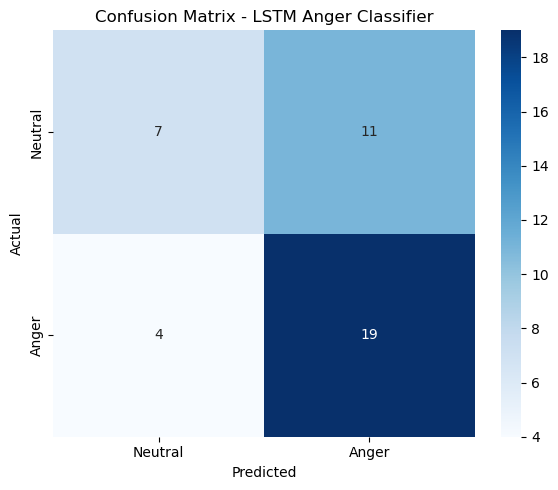

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Split our data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2]), return_sequences=False))  # 64 memory units
model.add(Dropout(0.3))  # helps prevent overfitting
model.add(Dense(32, activation='relu'))  # hidden layer
model.add(Dense(1, activation='sigmoid'))  # output layer (binary classification)

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=25,
    batch_size=8,
    verbose=1
)

# Predict on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int")

# Evaluation results
print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Neutral", "Anger"]))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Neutral", "Anger"], yticklabels=["Neutral", "Anger"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LSTM Anger Classifier")
plt.tight_layout()
plt.show()